### Use K Means Clustering to Group similar images

In [1]:
import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulation
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
from sklearn.cluster import KMeans

### Image Segmentation Using KMeans Clustering

- In digital image processing and computer vision, image segmentation is the process of partitioning a digital image into multiple segments

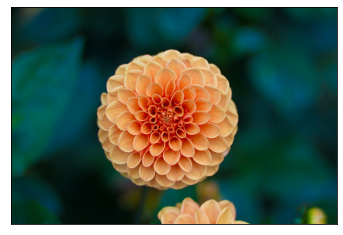

In [2]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [3]:
flower.shape

(427, 640, 3)

In [6]:
type(flower[0][0][0])

numpy.uint8

In [ ]:
data = flower / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

In [ ]:
kmeans = KMeans(2)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

In [ ]:
new_colors.shape

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('3-color Image', size=16);

### Further Exploration in Image Processing and Segmentation using Opencv-Python
- https://docs.opencv.org/master/d1/d5c/tutorial_py_kmeans_opencv.html

In [7]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [10]:
data = np.float32(flower)

In [11]:
data = data.reshape((-1,3))

In [12]:
data

array([[ 2., 19., 13.],
       [ 3., 18., 13.],
       [ 7., 20., 13.],
       ...,
       [ 7., 46., 28.],
       [ 8., 45., 28.],
       [ 9., 43., 27.]], dtype=float32)

In [13]:
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# Set flags (Just to avoid line break in the code)
flags = cv.KMEANS_RANDOM_CENTERS
# Apply KMeans
compactness,labels,centers = cv.kmeans(data,2,None,criteria,10,flags)

In [15]:
centers
center = np.uint8(centers)

In [17]:
res = center[labels.flatten()]

In [ ]:
res2

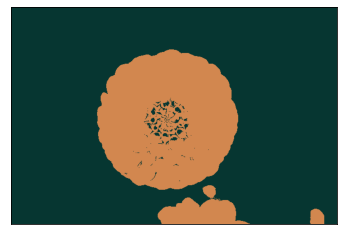

In [20]:
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(res2);

In [24]:
img = cv.imread('data/dog_1.jpeg')

In [38]:
def cluster_img(img_path,n_clusters= 3):
    img = cv.imread(img_path)
    data = np.float32(img)
    print(f"Shape of orignal image: {data.shape}")
    data = data.reshape((-1,3))
    print(f"Shape of orignal image: {data.shape}")
    
    # Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    # Set flags (Just to avoid line break in the code)
    flags = cv.KMEANS_RANDOM_CENTERS
    # Apply KMeans
    compactness,labels,centers = cv.kmeans(data,n_clusters,None,criteria,10,flags)
    center = np.uint8(centers)
    res = center[labels.flatten()]
    res2 = res.reshape((img.shape))
#     ax = plt.axes(xticks=[], yticks=[])
#     ax.imshow(res2)
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(img)
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(res2)
    ax[1].set_title('3-color Image', size=16)

Shape of orignal image: (186, 271, 3)
Shape of orignal image: (50406, 3)


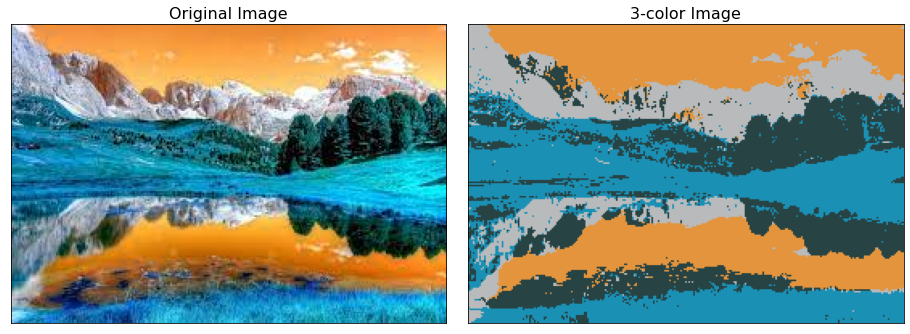

In [39]:
cluster_img("data/scene_1.jpeg",n_clusters= 4)